In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 as sql

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [3]:
db = sql.connect('datasets/p4k-kaggle.sqlite')
scores = pd.read_sql('SELECT reviewid, score FROM reviews', db)
artists = pd.read_sql('SELECT * FROM artists', db)
years = pd.read_sql('SELECT * FROM years', db)
genres2 = pd.read_sql('SELECT distinct genre FROM genres', db)
scores2 = pd.read_sql('SELECT reviewid, score, title FROM reviews', db)
print(genres2.genre)

#con.close()
#sqlpath = os.listdir('../input')
print(set(years))
#print(scores2.info())

cursor = db.cursor()
genres = {}
genre_lookup = {}
scores = {}
cursor.execute('select distinct genre from genres')
for row in cursor:
    genre_lookup[len(genre_lookup)] = row[0] 
    genres[row[0]] = []
    
print(genres, len(genres)) 
scores2['years'] = years.year
print(scores2.info())

# using List comprehension + isdigit() +split() 
# getting numbers from string to check artist name with numbers in it  
res = [int(i) for i in str(artists.artist.str.split()) if i.isdigit()] 

0      electronic
1           metal
2            rock
3            None
4             rap
5    experimental
6         pop/r&b
7    folk/country
8            jazz
9          global
Name: genre, dtype: object
{'year', 'reviewid'}
{'electronic': [], 'metal': [], 'rock': [], None: [], 'rap': [], 'experimental': [], 'pop/r&b': [], 'folk/country': [], 'jazz': [], 'global': []} 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviewid  18393 non-null  int64  
 1   score     18393 non-null  float64
 2   title     18393 non-null  object 
 3   years     18319 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 574.9+ KB
None


In [4]:
albums = pd.read_sql('SELECT artist, title, score, best_new_music, author_type, content FROM reviews INNER JOIN content ON reviews.reviewid=content.reviewid', db)

In [5]:
albums.head()

,artist,title,score,best_new_music,author_type,content
0,massive attack,mezzanine,9.3,0,contributor,"“Trip-hop” eventually became a ’90s punchline,..."
1,krallice,prelapsarian,7.9,0,contributor,"Eight years, five albums, and two EPs in, the ..."
2,uranium club,all of them naturals,7.3,0,contributor,Minneapolis’ Uranium Club seem to revel in bei...
3,"kleenex, liliput",first songs,9.0,1,associate reviews editor,Kleenex began with a crash. It transpired one ...
4,taso,new start,8.1,0,tracks coordinator,It is impossible to consider a given release b...


In [6]:
albums.loc[albums['artist'] == "michael jackson"]

,artist,title,score,best_new_music,author_type,content
503,michael jackson,dangerous,8.6,0,contributor,"On the night of November 14, 1991, 500 million..."
1092,michael jackson,off the wall,10.0,1,senior editor,"In the summer of 1976, a variety show called ""..."
3109,michael jackson,xscape,4.1,0,contributor,Michael Jackson has released more new music in...
10506,michael jackson,thriller: 25th anniversary edition,7.2,0,contributor,\nThriller is the biggest-selling album of all...
13534,michael jackson,the essential michael jackson,8.7,0,None,Eight thousand Michael Jackson fans-- the ones...
14380,michael jackson,the ultimate collection,8.0,0,contributor,The last time Michael Jackson was arrested for...


In [7]:
df_500greatest = pd.read_csv('datasets/rollingstones_500_greatest_albums.csv', encoding = "unicode_escape")
df_discogs = pd.read_csv('datasets/all_release_data_most_collected_08052022_1200.csv')
df_discogs_most_wanted = pd.read_csv('datasets/all_release_data_most_wanted_9799.csv')
df_p4k_spotify = pd.read_csv('datasets/p4kXspotify.csv', encoding = "unicode_escape")

In [8]:
df_discogs_most_wanted.head()

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0.0,53521.0,18838.0,4.56,6337.0,€45.00,€21.11,€189.99
1,1,Kanye West,My Beautiful Dark Twisted Fantasy,https://www.discogs.com/release/2606952-Kanye-...,Nov 2010,2010-11,['Hip Hop'],"['Contemporary R&B', 'Pop Rap']",US,"[['3 x vinyl', 'lp', 'album', 'limited edition']]",1,1,0,0,0,0,0,1,0,0.0,25052.0,14112.0,4.58,2084.0,€77.83,€28.30,€175.00
2,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,21065.0,13567.0,4.6,2845.0,€131.48,€16.98,€350.00
3,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0.0,20201.0,13245.0,4.69,2259.0,€92.99,€15.04,€475.00
4,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,19881.0,13137.0,4.72,2177.0,€76.00,€18.90,€166.25


In [9]:
df_mw_merged = pd.read_csv('datasets/all_release_data_p4k_spotify_filled_partial_most_wanted.csv')

In [10]:
df_mw_merged.head()

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588


In [11]:
df_mw_merged["score"].isnull().sum()

6287

In [12]:
albums.rename(columns = {'artist':'artist_lower','title':'title_lower'}, inplace = True)
albums.head()

,artist_lower,title_lower,score,best_new_music,author_type,content
0,massive attack,mezzanine,9.3,0,contributor,"“Trip-hop” eventually became a ’90s punchline,..."
1,krallice,prelapsarian,7.9,0,contributor,"Eight years, five albums, and two EPs in, the ..."
2,uranium club,all of them naturals,7.3,0,contributor,Minneapolis’ Uranium Club seem to revel in bei...
3,"kleenex, liliput",first songs,9.0,1,associate reviews editor,Kleenex began with a crash. It transpired one ...
4,taso,new start,8.1,0,tracks coordinator,It is impossible to consider a given release b...


In [13]:
df_mw_merged_p4k_kaggle = pd.merge(df_mw_merged, albums, how="left", left_on=["title_lower","artist_lower"], right_on=["title_lower","artist_lower"])
#df_mw_merged_p4k_kaggle.rename( columns={'Unnamed: 0':'most_want_rank'}, inplace=True )
df_mw_merged_p4k_kaggle.sort_values(by=['most_want_rank'])

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score_x,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,score_y,best_new_music,author_type,content
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,8.8,1.0,executive editor,"In the electronica landscape of the 1990s, Daf..."
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071,6.4,0.0,editor-in-chief,"""One more time, we're gonna celebrate, oh yeah..."
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333,NaN,NaN,NaN,NaN
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318,NaN,NaN,NaN,NaN
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a. (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933,NaN,NaN,NaN,NaN
8489,8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush,Kate Bush,Hounds of Love,Barry Walters,10.0,1985.0,June 12 2016,EMI,Pop/R&B,0.523833,0.392433,4.666667,-15.414750,0.053358,0.64350

In [14]:
df_mw_merged_p4k_kaggle[["score_y","score_x"]].isnull().sum()

score_y    6763
score_x    6287
dtype: int64

In [15]:
df_mw_merged["artist_lower"] = df_mw_merged["artist_lower"].replace('\([^)]*\)','', regex=True)
df_mw_merged["artist_lower"]

0          daft punk
1          daft punk
2       wu-tang clan
3               doom
4        frank ocean
            ...     
8450         m.i.a. 
8451       kate bush
8452     donald byrd
8453            joy 
8454       the cult 
Name: artist_lower, Length: 8455, dtype: object

In [16]:
df_mw_merged["artist_lower"] = df_mw_merged["artist_lower"].str.strip()
df_mw_merged["artist_lower"]

0          daft punk
1          daft punk
2       wu-tang clan
3               doom
4        frank ocean
            ...     
8450          m.i.a.
8451       kate bush
8452     donald byrd
8453             joy
8454        the cult
Name: artist_lower, Length: 8455, dtype: object

In [17]:
df_mw_merged_p4k_kaggle_clean = pd.merge(df_mw_merged, albums, how="left", left_on=["title_lower","artist_lower"], right_on=["title_lower","artist_lower"])
#df_mw_merged_p4k_kaggle.rename( columns={'Unnamed: 0':'most_want_rank'}, inplace=True )
df_mw_merged_p4k_kaggle_clean.sort_values(by=['most_want_rank'])

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score_x,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,score_y,best_new_music,author_type,content
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,8.8,1.0,executive editor,"In the electronica landscape of the 1990s, Daf..."
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071,6.4,0.0,editor-in-chief,"""One more time, we're gonna celebrate, oh yeah..."
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333,NaN,NaN,NaN,NaN
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318,NaN,NaN,NaN,NaN
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933,6.5,0.0,contributor,"""I don't pay attention to what's happening now..."
8490,8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush,Kate Bush,Hounds of Love,Barry Walters,10.0,1985.0,June 12 2016,EMI,Pop/R&B,0

In [18]:
df_mw_merged_p4k_kaggle_clean["score_copy"] = df_mw_merged_p4k_kaggle_clean["score_x"]
df_mw_merged_p4k_kaggle_clean

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score_x,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,score_y,best_new_music,author_type,content,score_copy
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,8.8,1.0,executive editor,"In the electronica landscape of the 1990s, Daf...",8.8
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071,6.4,0.0,editor-in-chief,"""One more time, we're gonna celebrate, oh yeah...",6.4
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333,NaN,NaN,NaN,NaN,NaN
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318,NaN,NaN,NaN,NaN,NaN
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933,6.5,0.0,contributor,"""I don't pay attention to what's happening now...",NaN
8490,8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush,Kate Bush,Hounds of Love,Barry Walters

In [19]:
df_mw_merged_p4k_kaggle_clean["score_copy"].fillna(df_mw_merged_p4k_kaggle_clean['score_y'])

0        8.8
1        6.4
2        NaN
3        NaN
4        NaN
        ... 
8489     6.5
8490    10.0
8491     NaN
8492     NaN
8493     NaN
Name: score_copy, Length: 8494, dtype: float64

In [20]:
df_mw_merged_p4k_kaggle_clean[["score_y","score_x","score_copy"]].isnull().sum()

score_y       6698
score_x       6288
score_copy    6288
dtype: int64

In [21]:
df_mw_merged_p4k_kaggle_clean.score_copy = np.where(df_mw_merged_p4k_kaggle_clean.score_copy.isnull(), df_mw_merged_p4k_kaggle_clean.score_y, df_mw_merged_p4k_kaggle_clean.score_copy)

In [22]:
df_mw_merged_p4k_kaggle_clean

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score_x,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,score_y,best_new_music,author_type,content,score_copy
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,8.8,1.0,executive editor,"In the electronica landscape of the 1990s, Daf...",8.8
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071,6.4,0.0,editor-in-chief,"""One more time, we're gonna celebrate, oh yeah...",6.4
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333,NaN,NaN,NaN,NaN,NaN
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318,NaN,NaN,NaN,NaN,NaN
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933,6.5,0.0,contributor,"""I don't pay attention to what's happening now...",6.5
8490,8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush,Kate Bush,Hounds of Love,Barry Walters

In [23]:
test_df = df_mw_merged_p4k_kaggle_clean[0:10]

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10 non-null     int64  
 1   most_want_rank     10 non-null     int64  
 2   artist_x           10 non-null     object 
 3   title_x            10 non-null     object 
 4   url                10 non-null     object 
 5   year               10 non-null     int64  
 6   date               10 non-null     object 
 7   genres             10 non-null     object 
 8   styles             10 non-null     object 
 9   countries          10 non-null     object 
 10  formats            10 non-null     object 
 11  issue_type         10 non-null     int64  
 12  limited            10 non-null     int64  
 13  picture_disc       10 non-null     int64  
 14  box_set            10 non-null     int64  
 15  numbered           10 non-null     int64  
 16  test_pressing      10 non-nul

In [25]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [26]:
df_mw_merged_p4k_kaggle_clean['genre_list'] = df_mw_merged_p4k_kaggle_clean['genres'].str.strip('[]').str.split(',')

In [27]:
df_mw_merged_p4k_kaggle_clean

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score_x,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,score_y,best_new_music,author_type,content,score_copy,genre_list
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,8.8,1.0,executive editor,"In the electronica landscape of the 1990s, Daf...",8.8,"['Electronic', 'Funk / Soul', 'Pop']"
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071,6.4,0.0,editor-in-chief,"""One more time, we're gonna celebrate, oh yeah...",6.4,['Electronic']
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333,NaN,NaN,NaN,NaN,NaN,['Hip Hop']
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318,NaN,NaN,NaN,NaN,NaN,['Hip Hop']
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588,NaN,NaN,NaN,NaN,NaN,"['Hip Hop', 'Funk / Soul', 'Pop']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933,6.5,0.0,contributor,"""I don't pay attention to what's happening now...",6.5,"['Electronic', 'Hip Hop', 'Pop']"
8490,8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl'

In [28]:
df_long = df_mw_merged_p4k_kaggle_clean.explode("genre_list")
df_long["genre_list"] = df_long["genre_list"].replace('[^0-9a-zA-Z]+','', regex=True)

<AxesSubplot:title={'center':'price_median'}, xlabel='[genre_list, year]'>

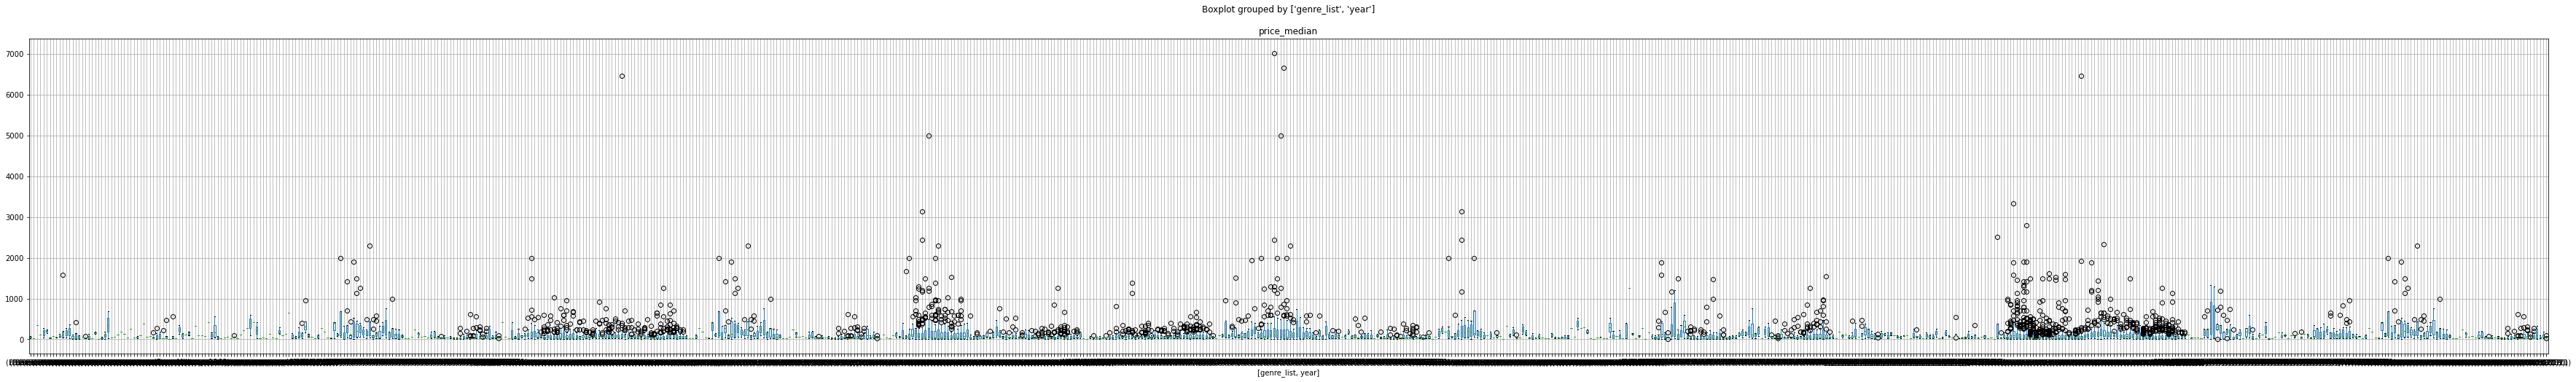

In [29]:
boxplot = df_long.boxplot(column=['price_median'],by=["genre_list","year"],figsize=(60,8))
boxplot

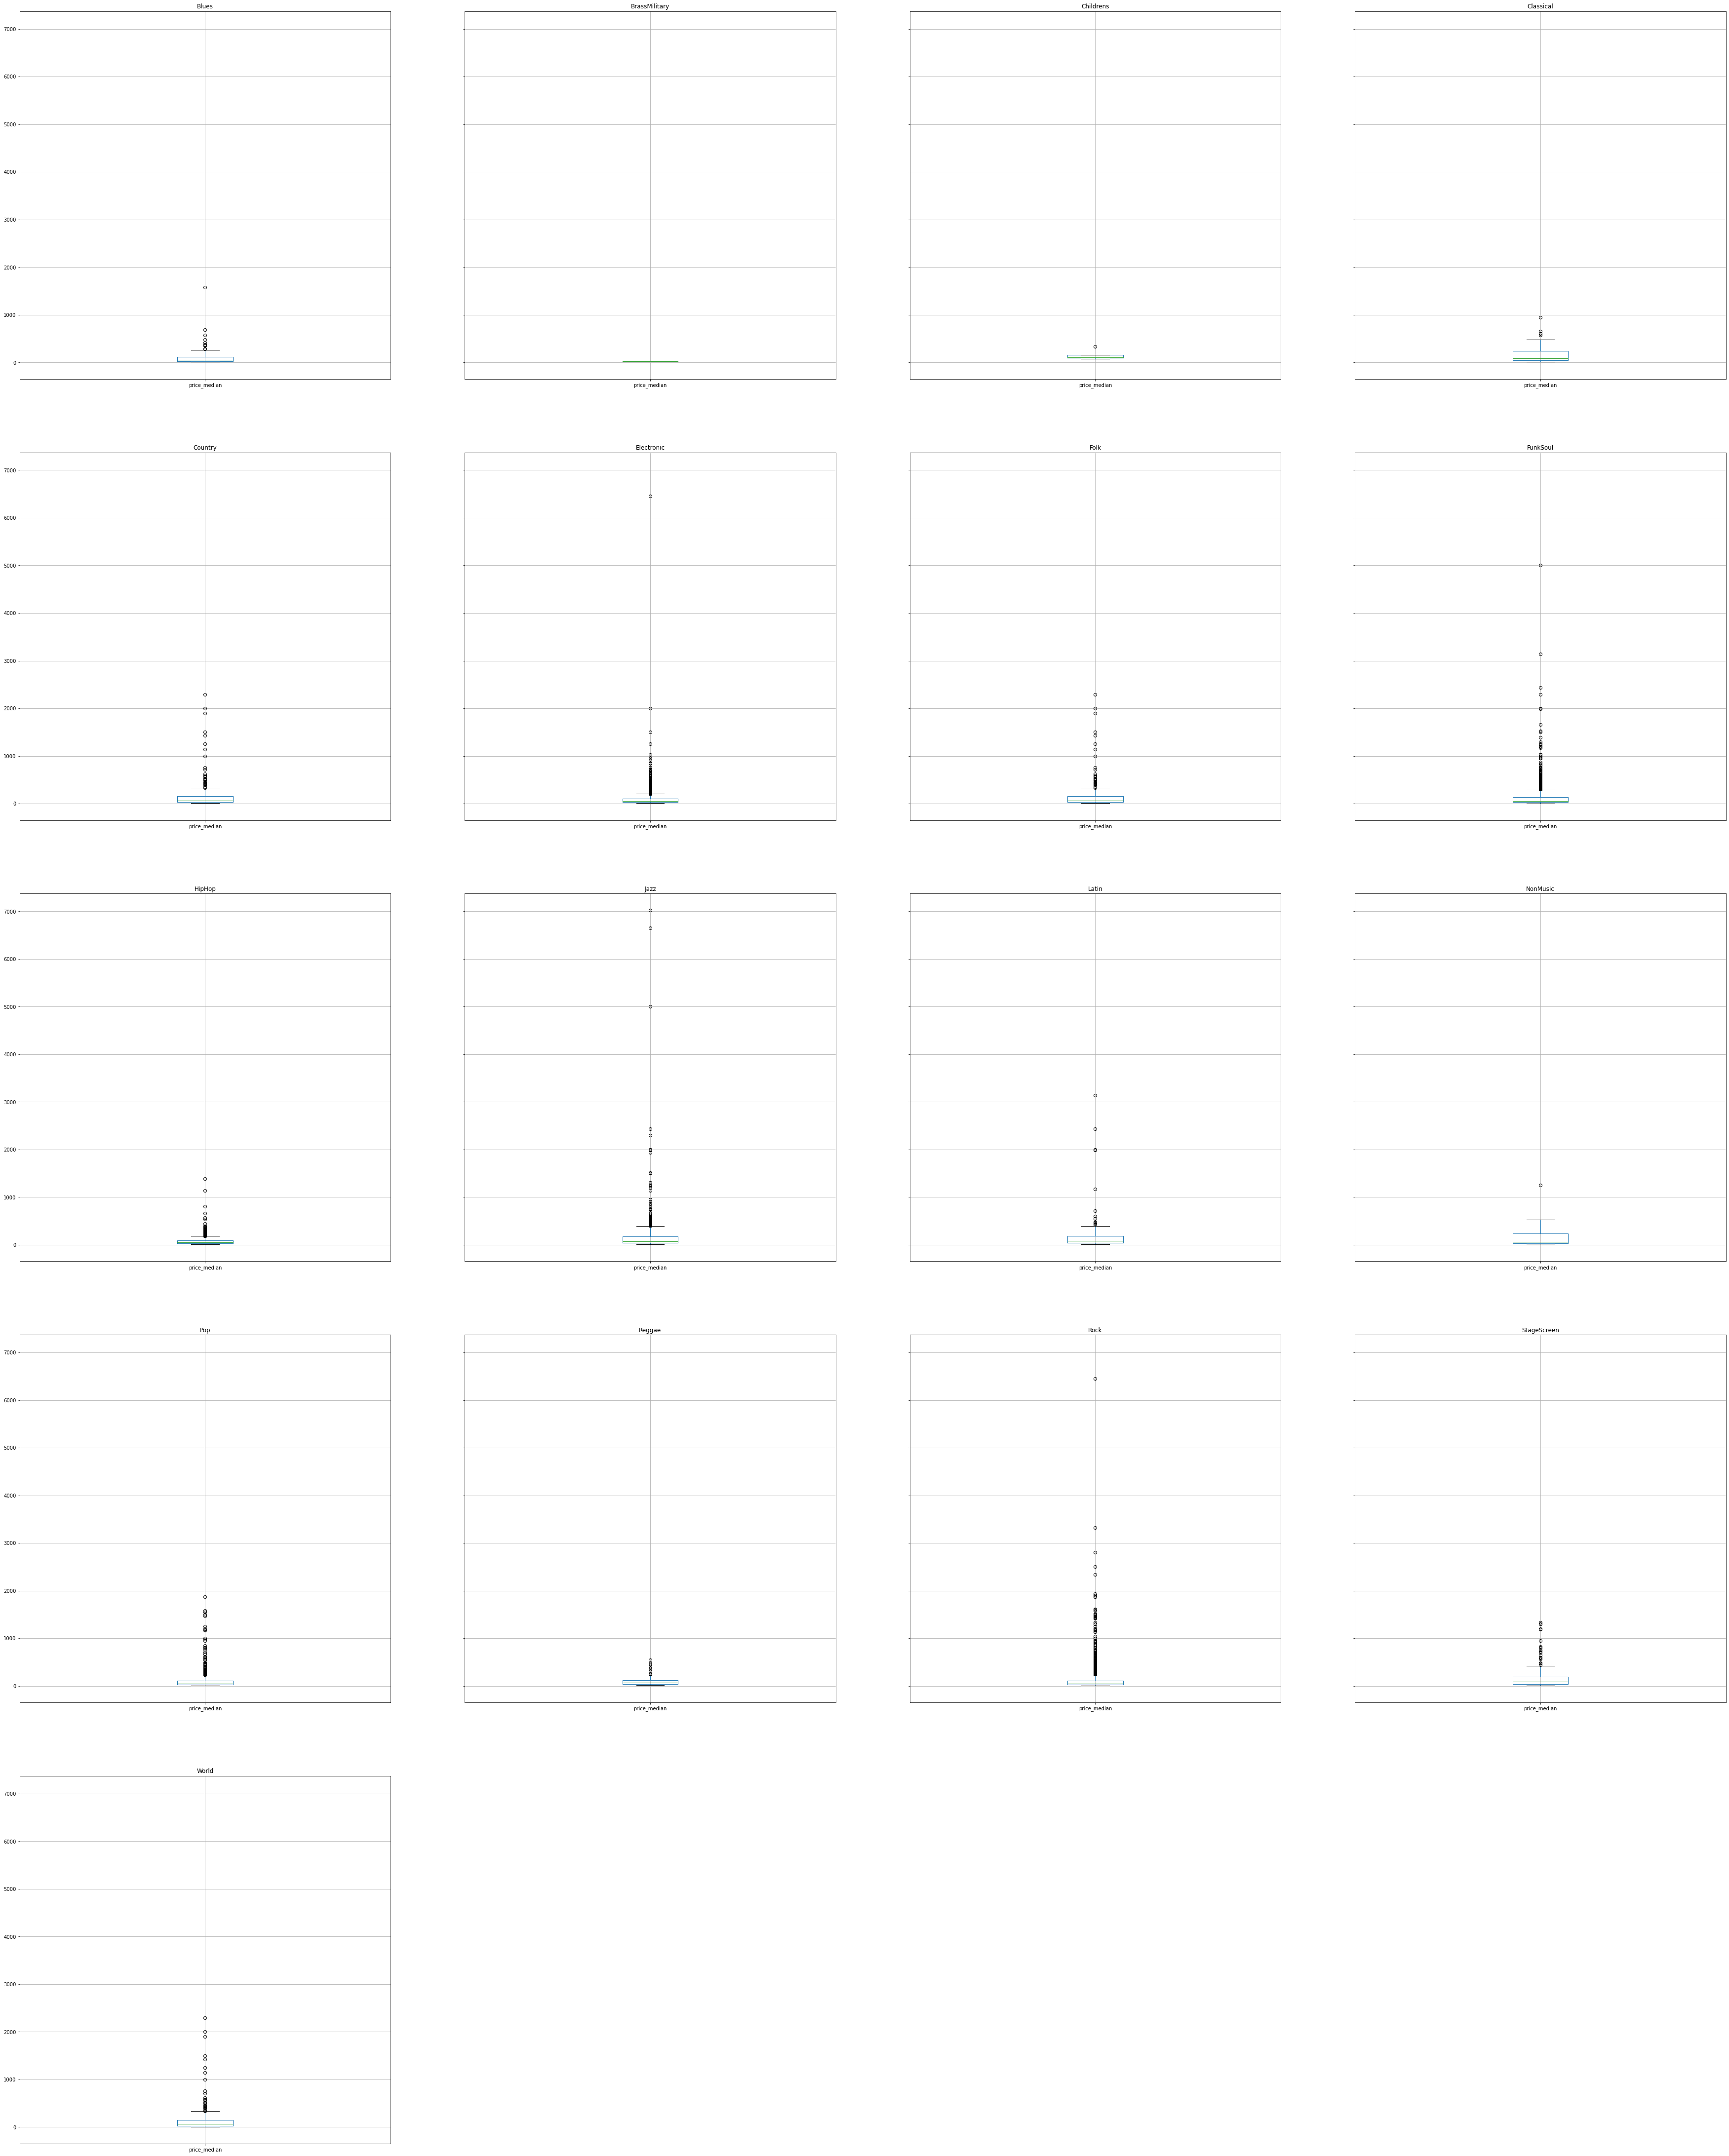

In [30]:
df_long.groupby("genre_list").boxplot(column="price_median",figsize=(60,80));

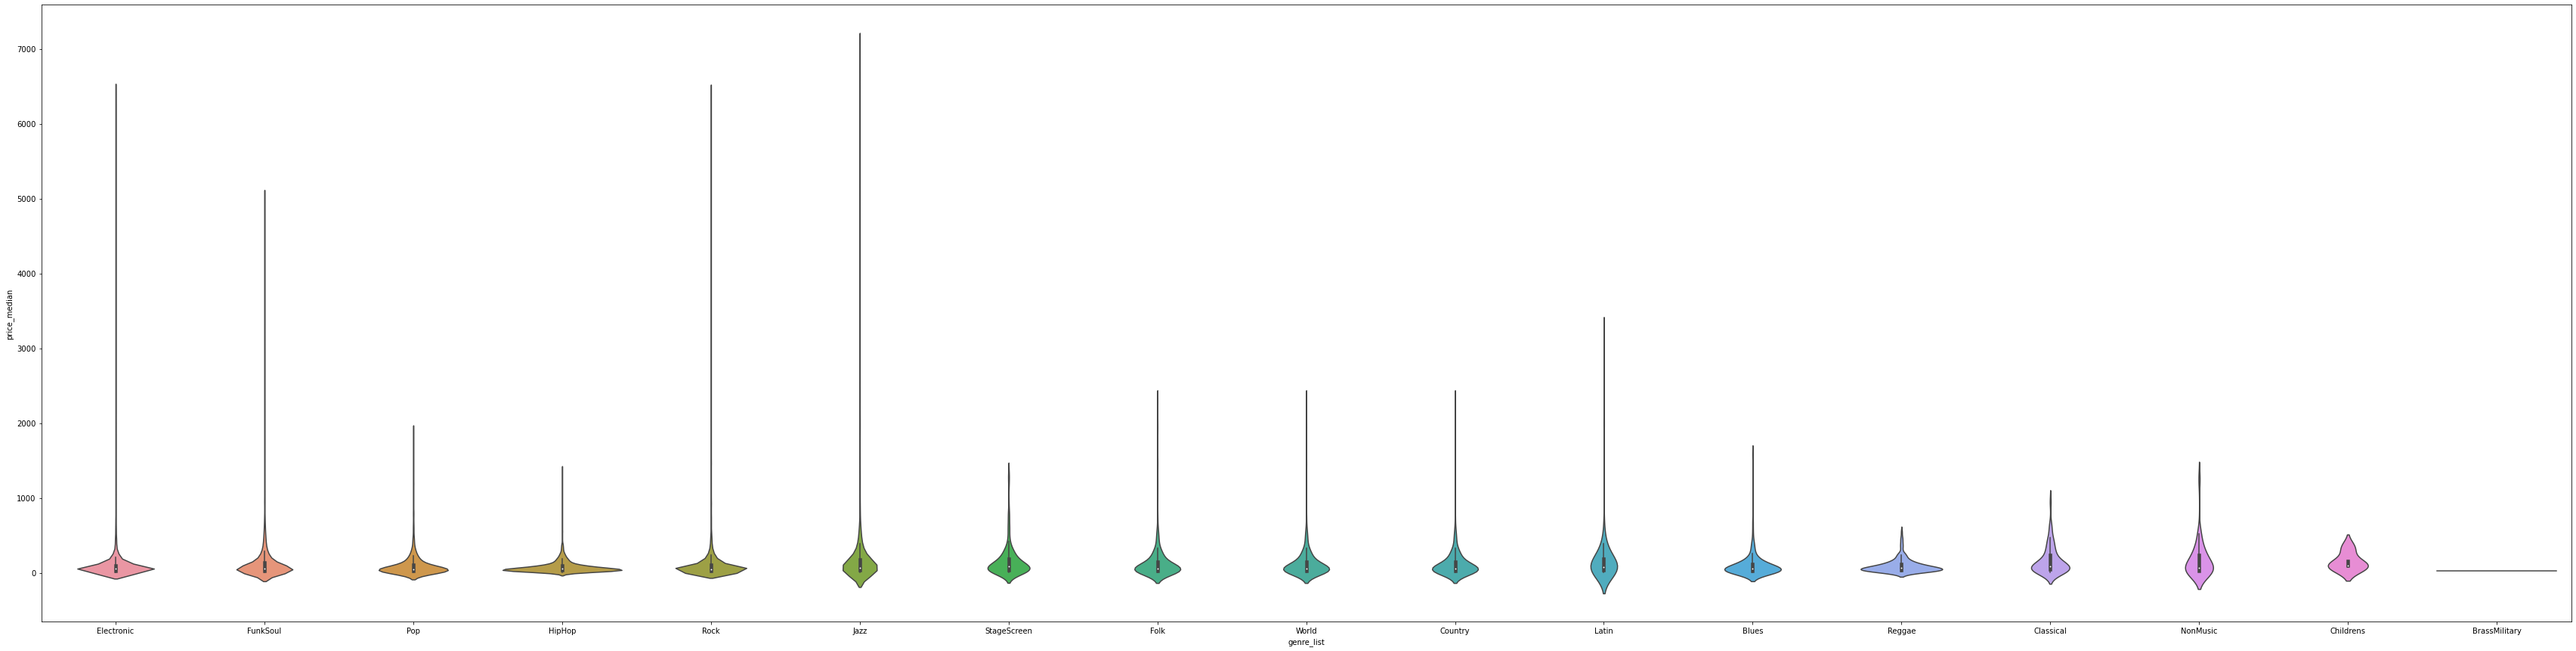

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(60,15))
sns.violinplot(x="genre_list", y="price_median", data=df_long,ax=ax);

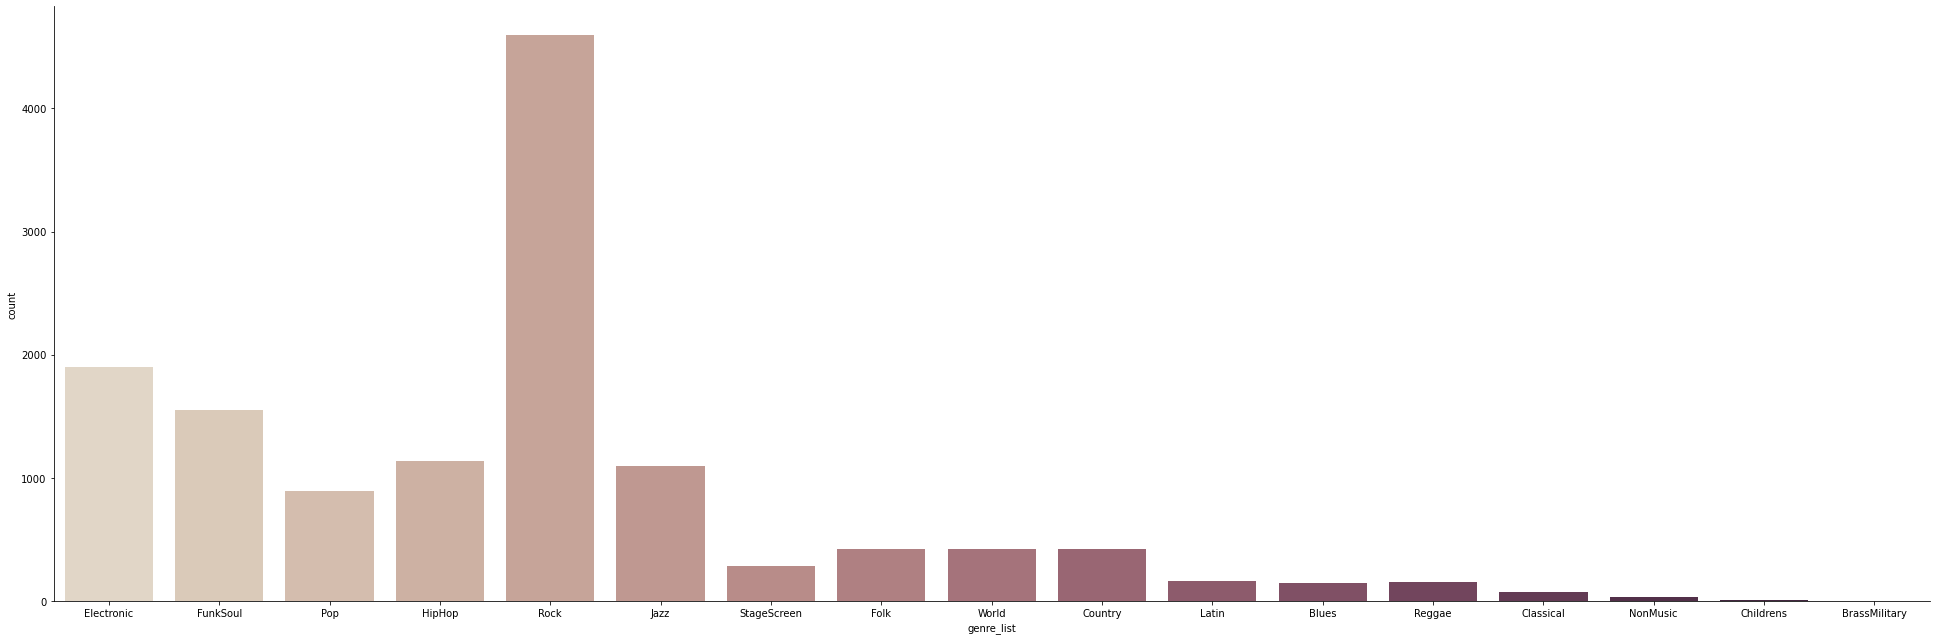

In [32]:
sns.catplot(x="genre_list", kind="count", palette="ch:.25", data=df_long, height=9, aspect=3);

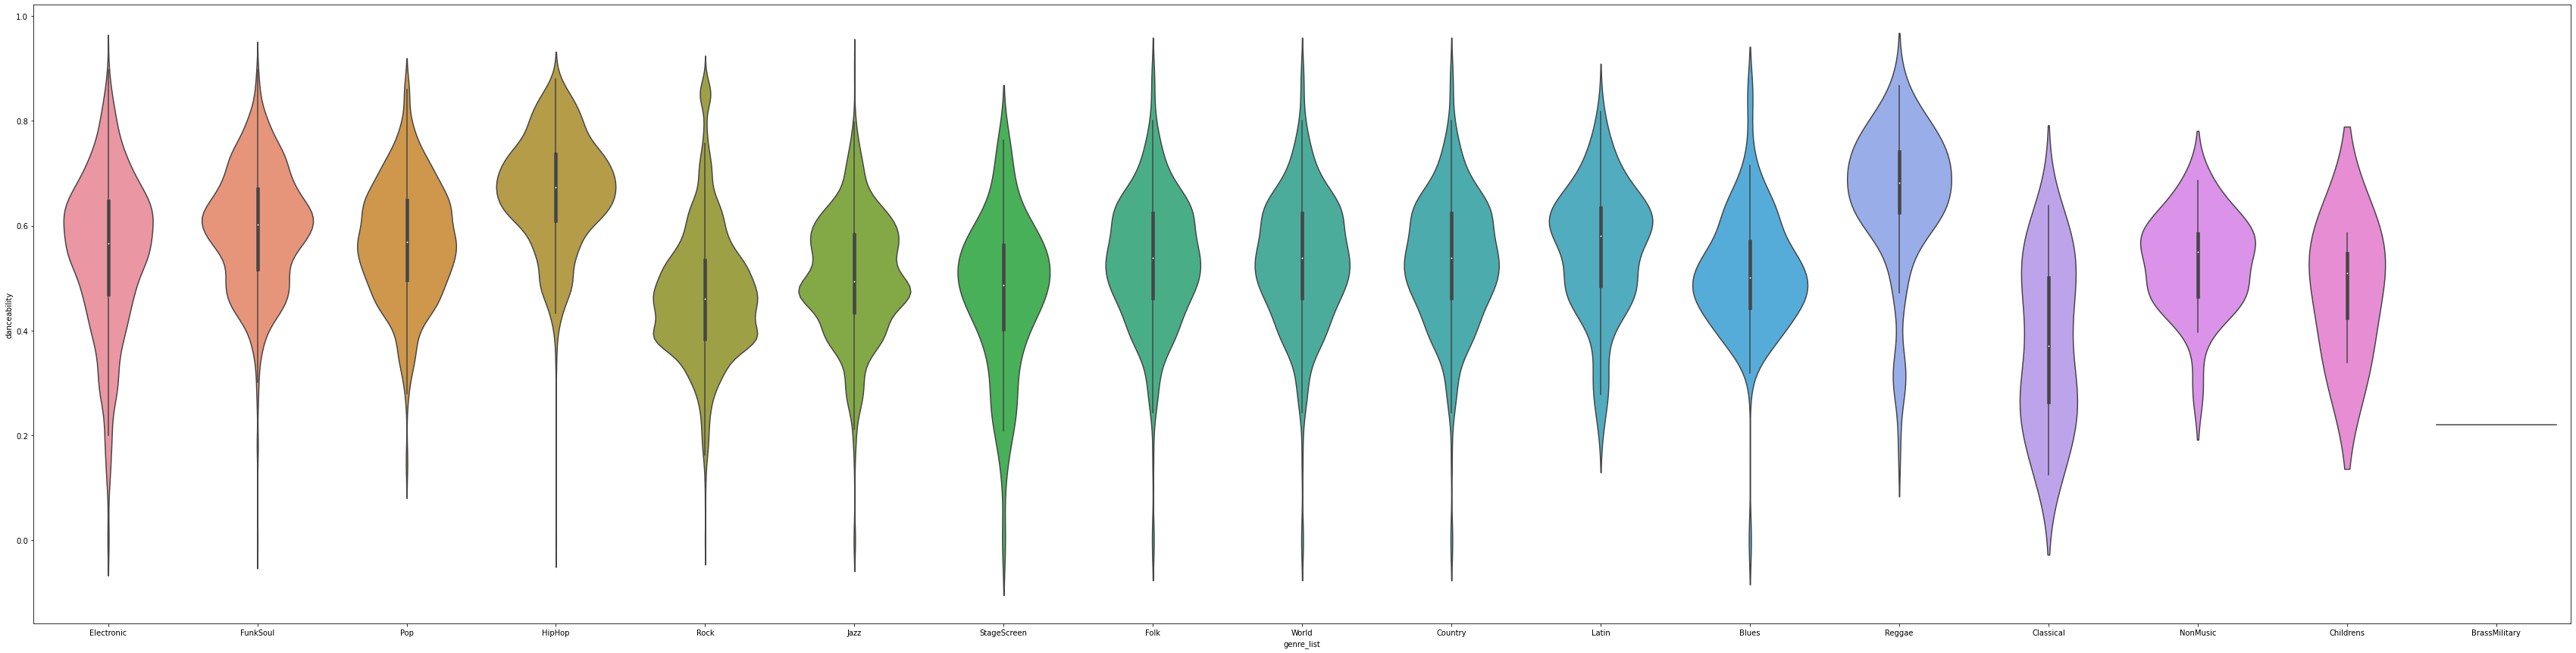

In [33]:
fig, ax = plt.subplots(figsize=(60,15))
sns.violinplot(x="genre_list", y="danceability", data=df_long,ax=ax);

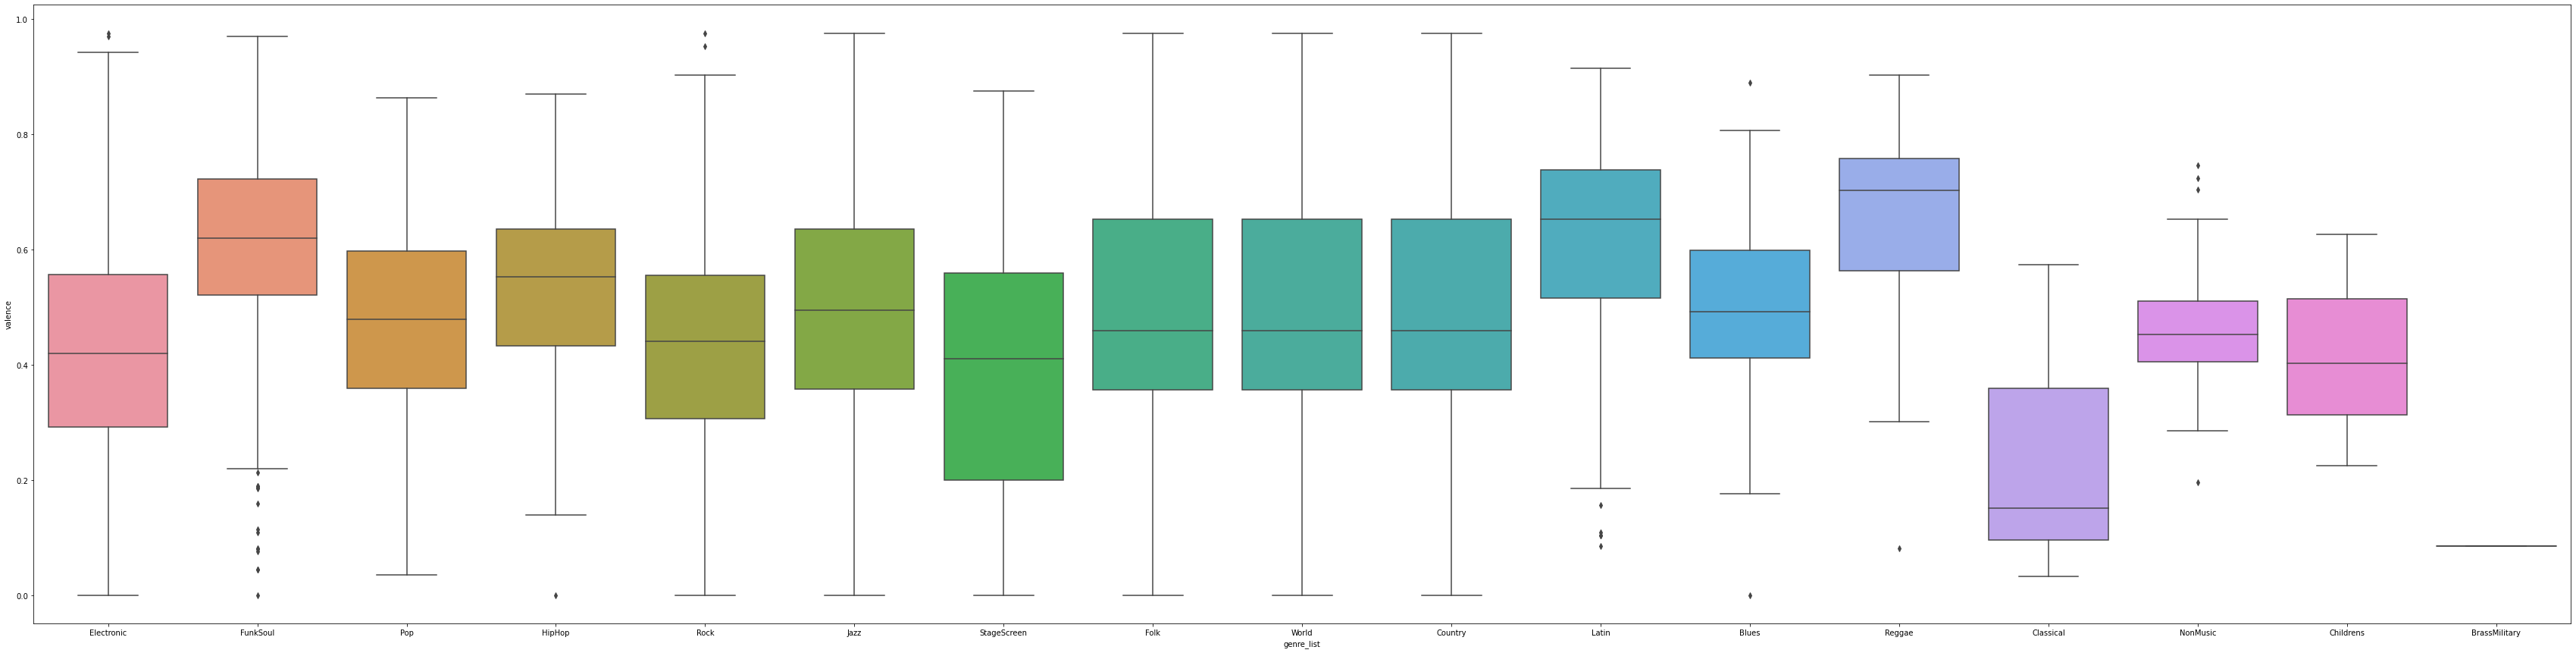

In [34]:
fig, ax = plt.subplots(figsize=(60,15))
sns.boxplot(x="genre_list", y="valence", data=df_long,ax=ax);

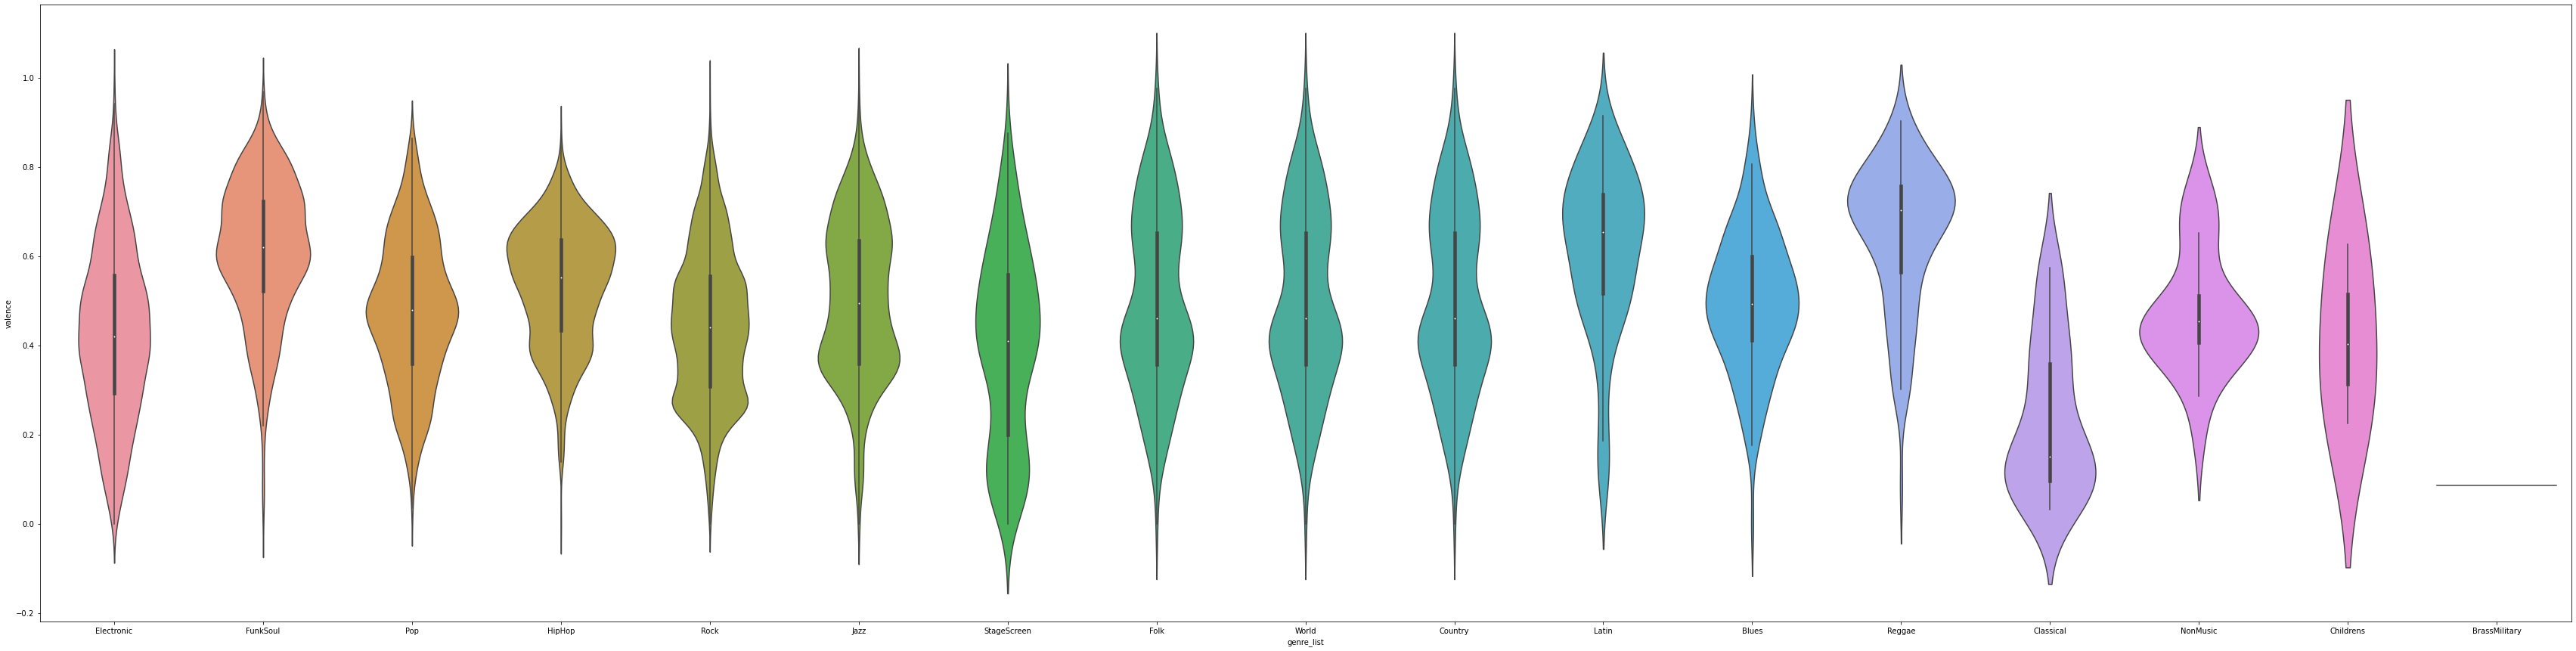

In [35]:
fig, ax = plt.subplots(figsize=(60,15))
sns.violinplot(x="genre_list", y="valence", data=df_long,ax=ax);

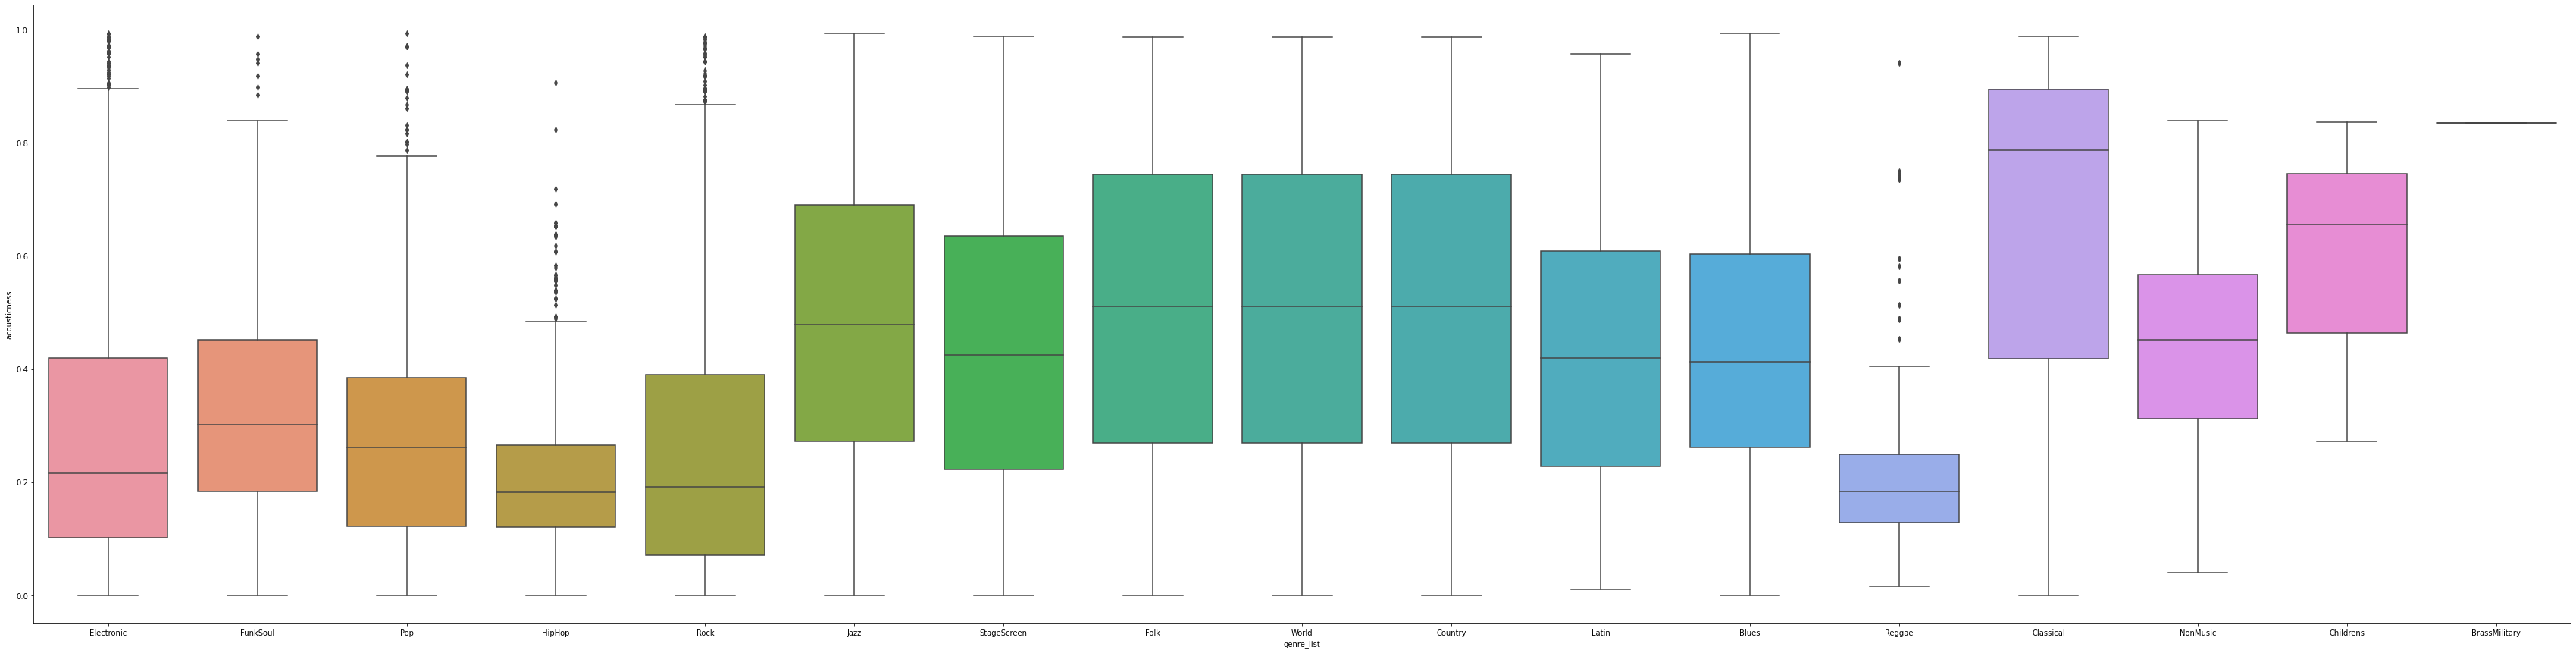

In [36]:
fig, ax = plt.subplots(figsize=(60,15))
sns.boxplot(x="genre_list", y="acousticness", data=df_long,ax=ax);

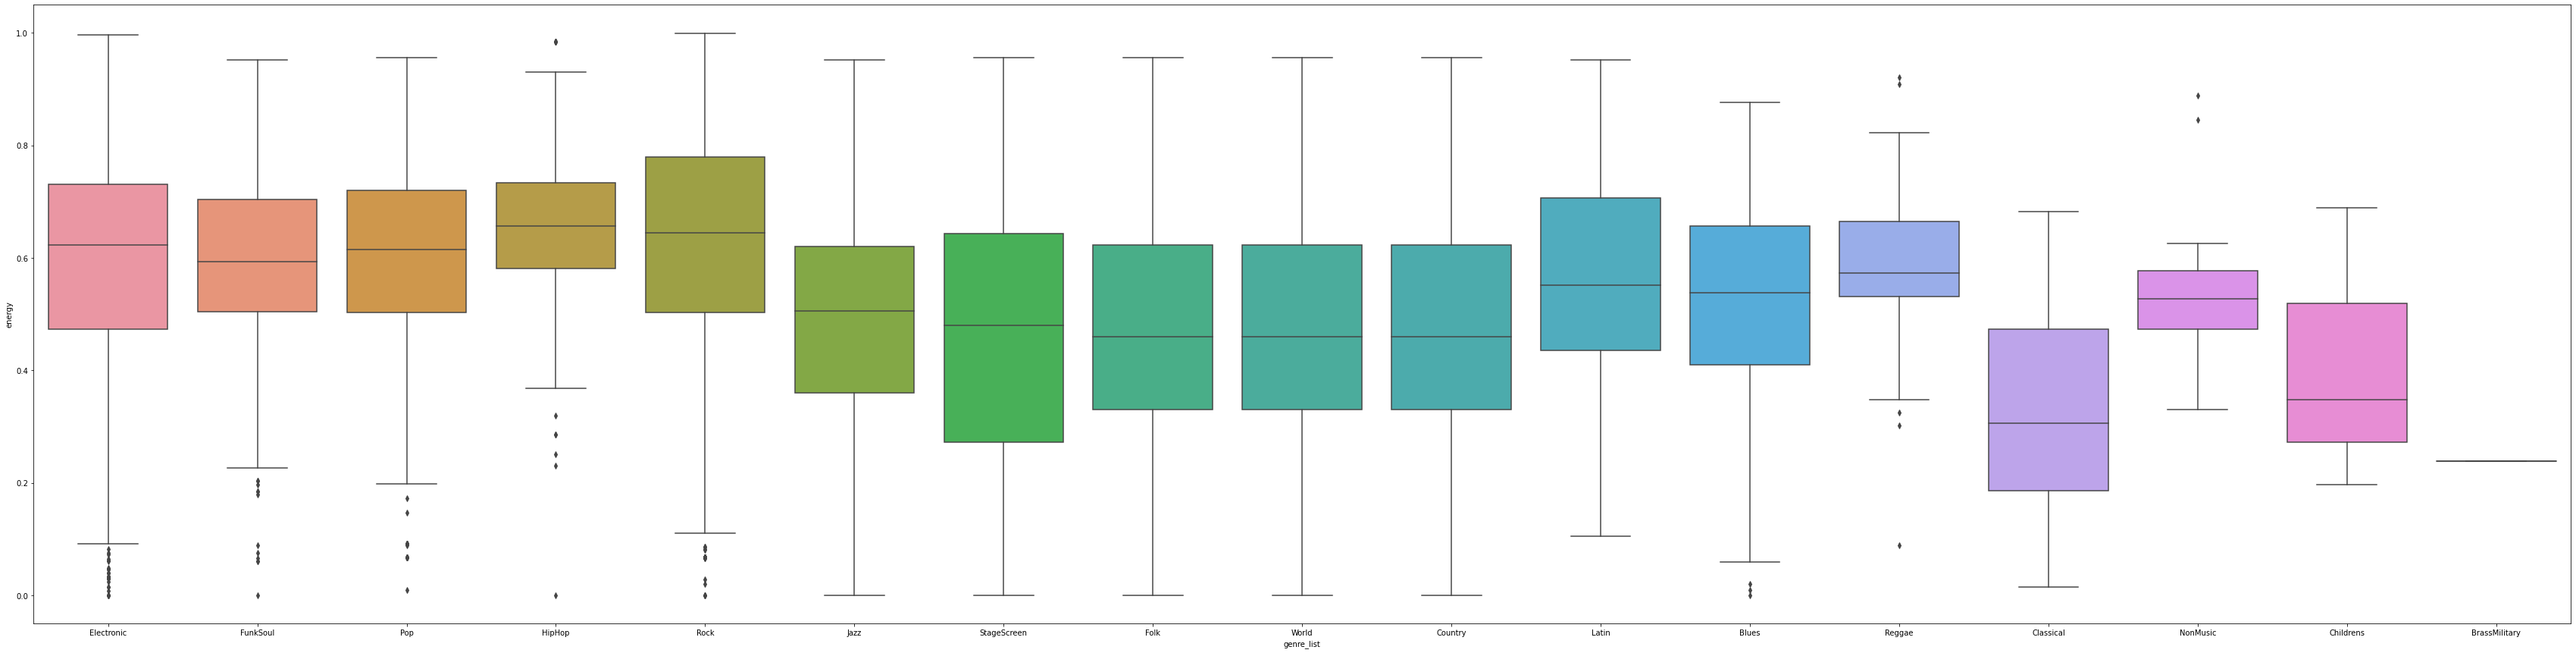

In [37]:
fig, ax = plt.subplots(figsize=(60,15))
sns.boxplot(x="genre_list", y="energy", data=df_long,ax=ax);

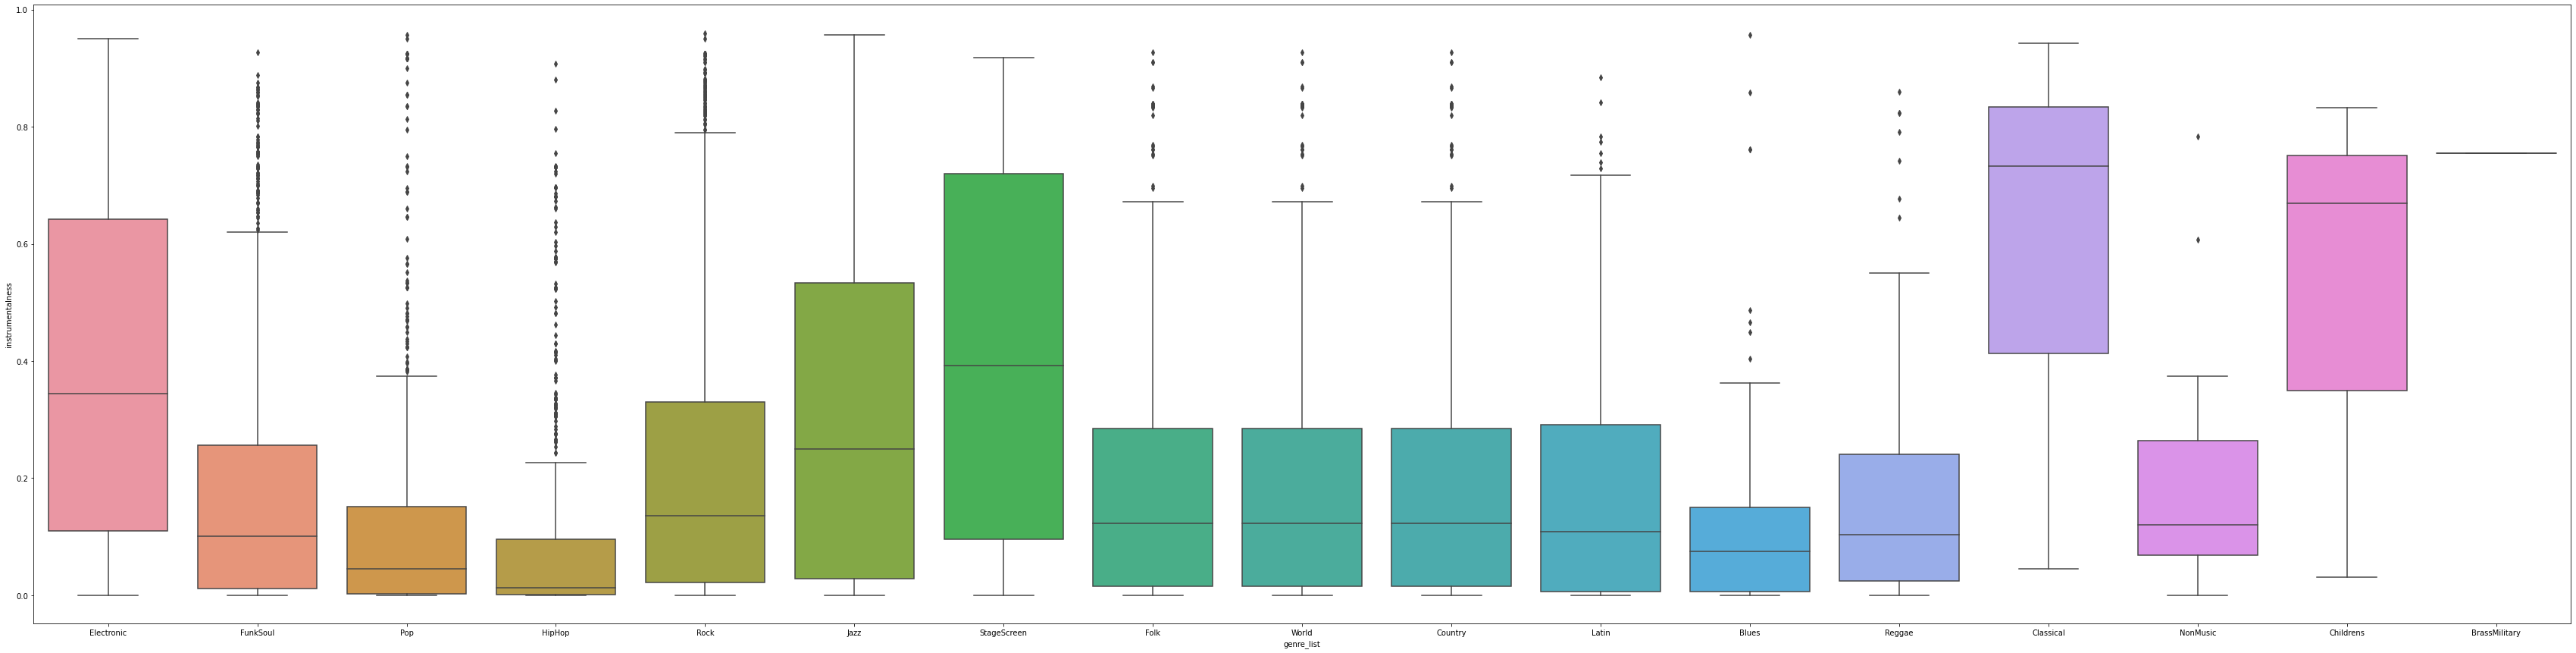

In [38]:
fig, ax = plt.subplots(figsize=(60,15))
sns.boxplot(x="genre_list", y="instrumentalness", data=df_long,ax=ax);

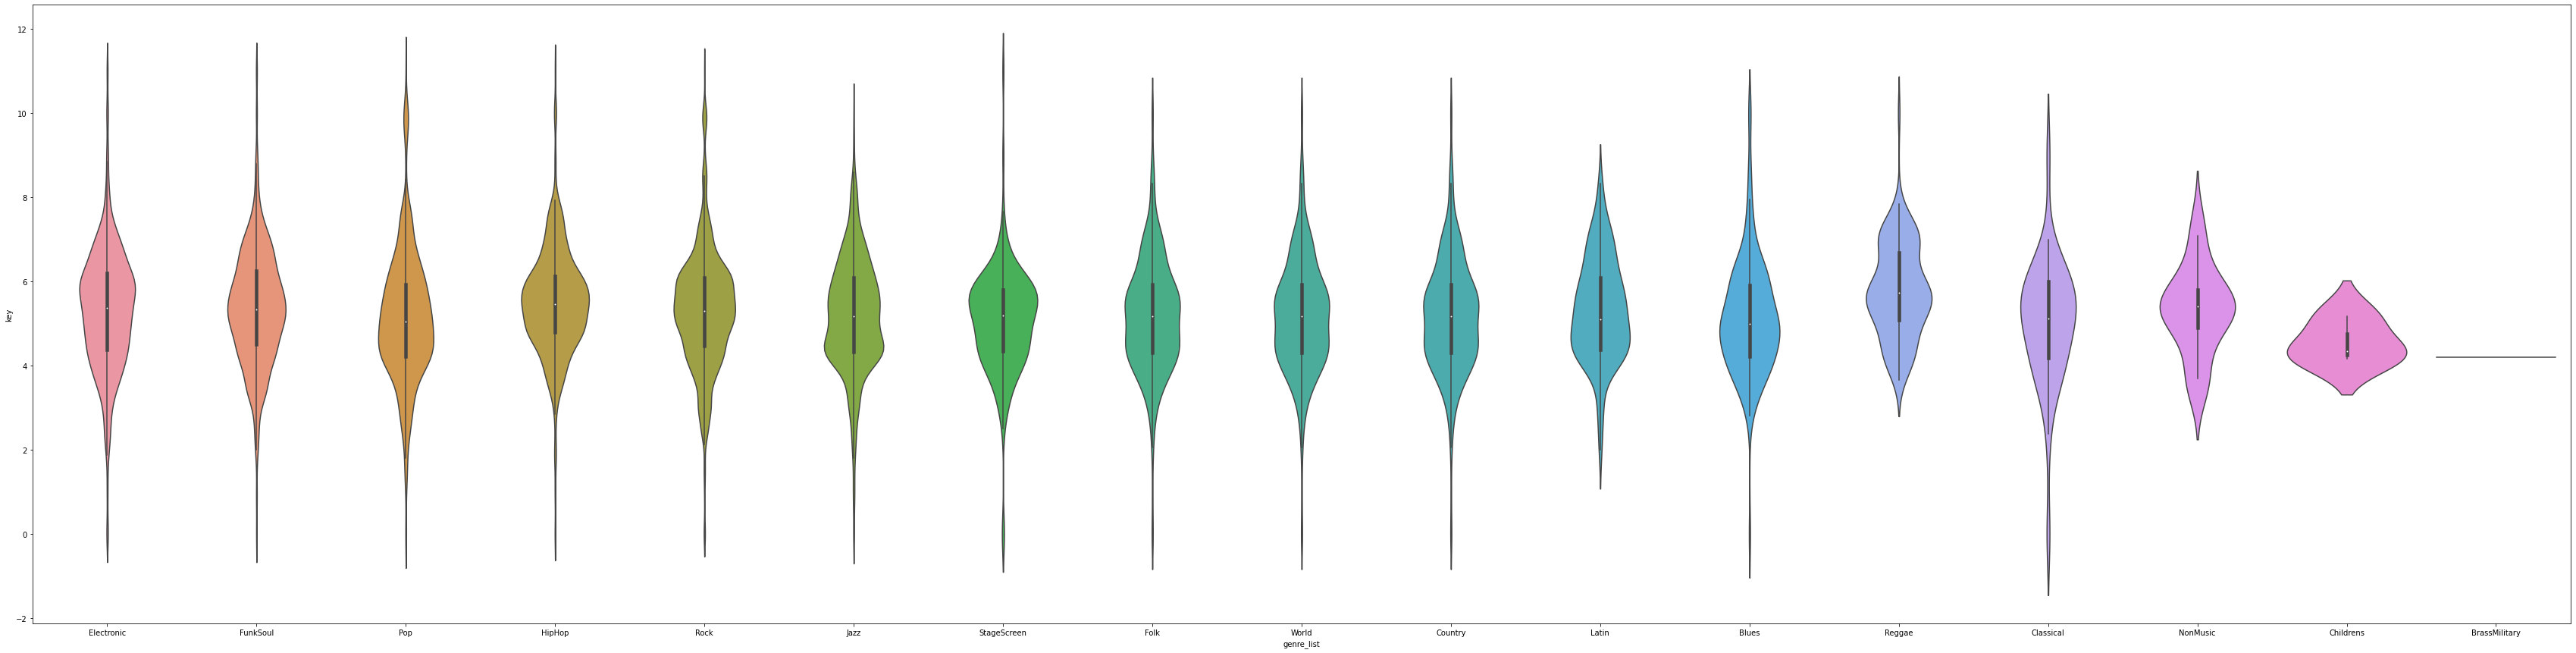

In [39]:
fig, ax = plt.subplots(figsize=(60,15))
sns.violinplot(x="genre_list", y="key", data=df_long,ax=ax);

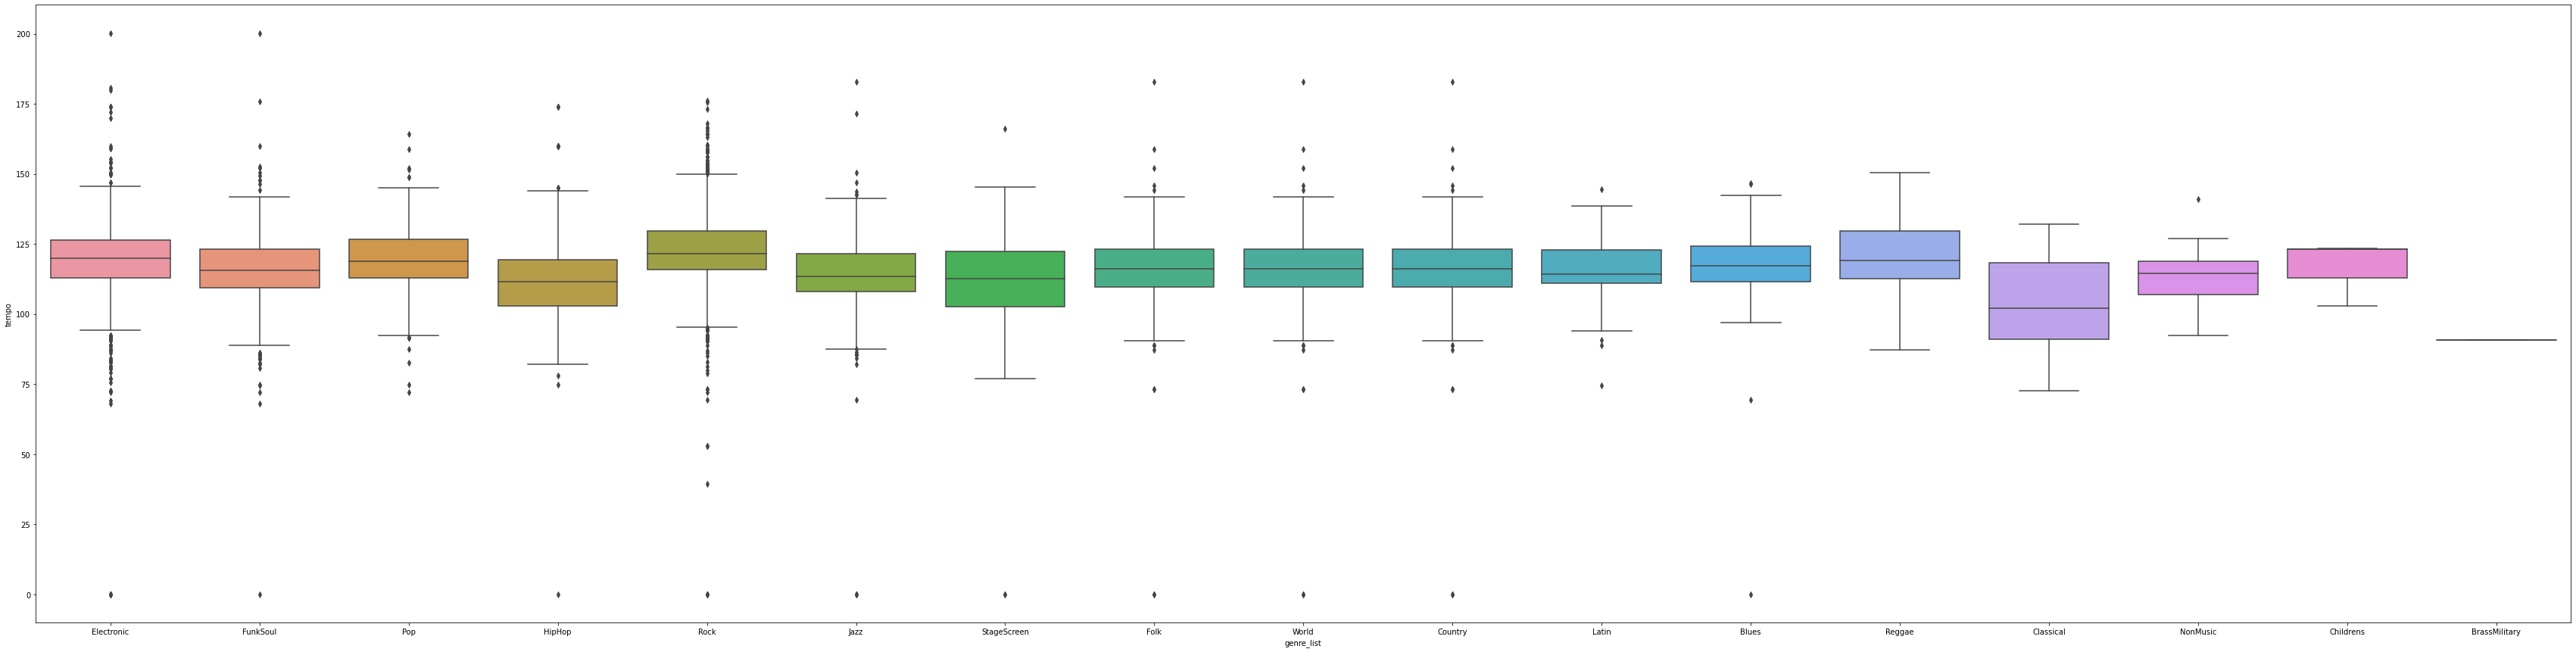

In [40]:
fig, ax = plt.subplots(figsize=(60,15))
sns.boxplot(x="genre_list", y="tempo", data=df_long,ax=ax);

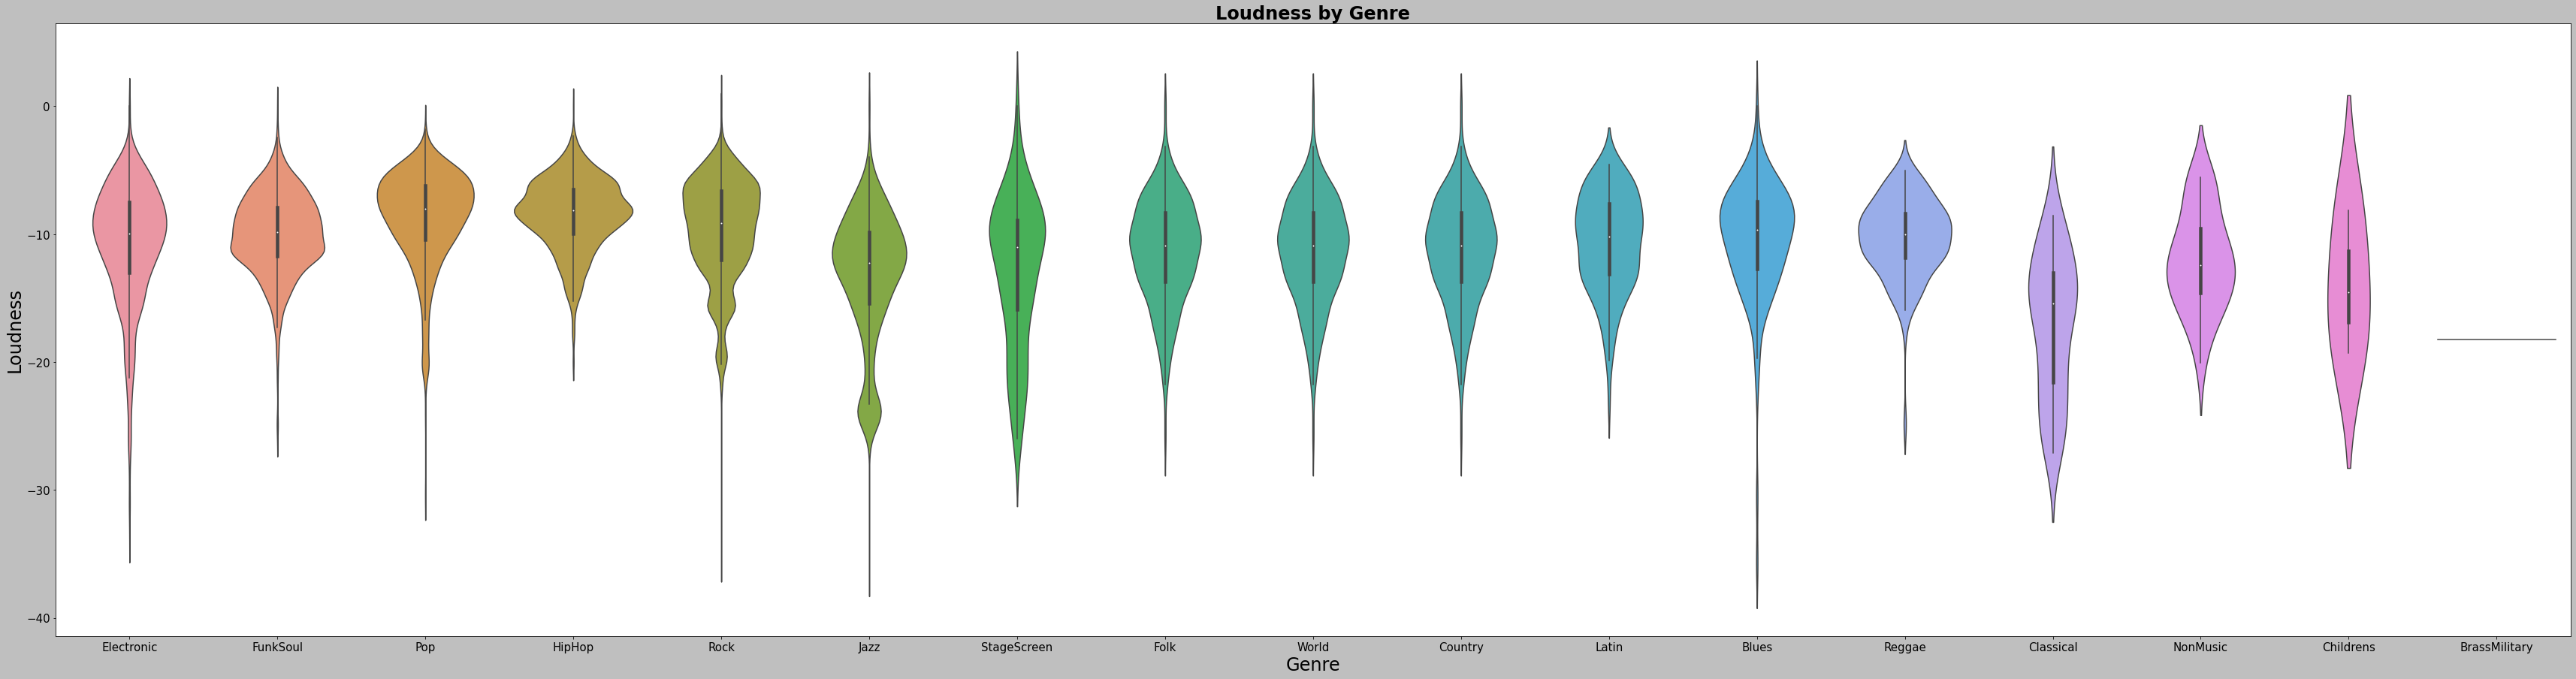

In [54]:
fig, ax = plt.subplots(figsize=(60,15))

loudness_plot = sns.violinplot(x="genre_list", y="loudness", data=df_long,ax=ax)
loudness_plot.set_title('Loudness by Genre',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
loudness_plot.set_xlabel('Genre',fontdict= { 'fontsize': 24, 'fontweight':'light'})
loudness_plot.set_ylabel('Loudness',fontdict= { 'fontsize': 24, 'fontweight':'light'})
loudness_plot.tick_params(labelsize=15);

In [168]:
df_long_price_limit = df_long[df_long['price_median'] <= 300]

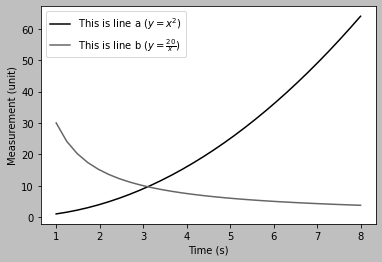

In [44]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('grayscale') # selecting the style sheet
x = np.linspace(1., 8., 30) # create dummy data
plt.figure()
plt.plot(x, x**2, label=r'This is line a ($y=x^2$)')
plt.plot(x, 30/x, label = r'This is line b ($y=\frac{20}{x}$)')
plt.xlabel('Time (s)')
plt.ylabel('Measurement (unit)')
plt.legend()

In [83]:
plt.style.reload_library()

In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

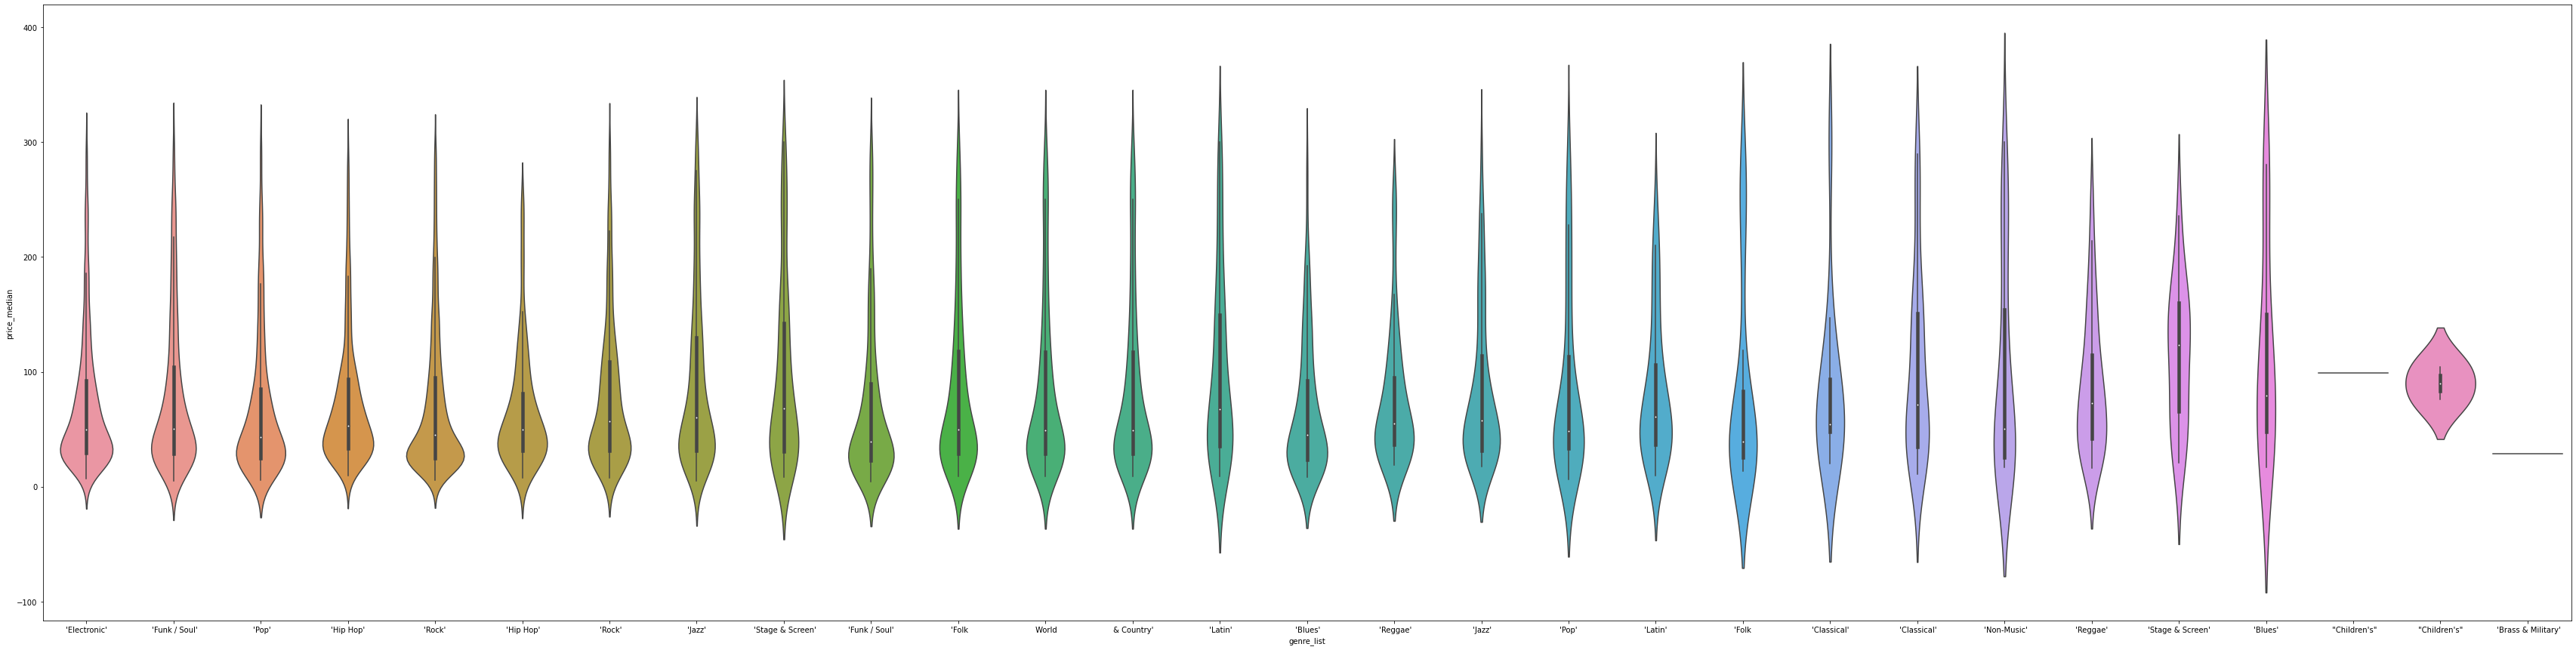

In [169]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(60,15))
sns.violinplot(x="genre_list", y="price_median", data=df_long_price_limit,ax=ax);

In [72]:
df_mw_merged_p4k_kaggle_clean.explode("styles")

,Unnamed: 0,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score_x,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,score_y,best_new_music,author_type,content,score_copy,genre_list
0,0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,8.8,1.0,executive editor,"In the electronica landscape of the 1990s, Daf...",8.8,"['Electronic', 'Funk / Soul', 'Pop']"
1,1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071,6.4,0.0,editor-in-chief,"""One more time, we're gonna celebrate, oh yeah...",6.4,['Electronic']
2,2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333,NaN,NaN,NaN,NaN,NaN,['Hip Hop']
3,3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318,NaN,NaN,NaN,NaN,NaN,['Hip Hop']
4,4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588,NaN,NaN,NaN,NaN,NaN,"['Hip Hop', 'Funk / Soul', 'Pop']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933,6.5,0.0,contributor,"""I don't pay attention to what's happening now...",6.5,"['Electronic', 'Hip Hop', 'Pop']"
8490,8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl'

In [73]:
df_mw_merged_p4k_kaggle_clean["styles"].unique()

array(["['Disco', 'Funk', 'Synth-pop']", "['House', 'Disco']",
       "['Hardcore Hip-Hop', 'Boom Bap']", ...,
       "['Downtempo', 'Abstract', 'Trip Hop']", "['Electroclash']",
       "['Hard Bop', 'Latin Jazz']"], dtype=object)

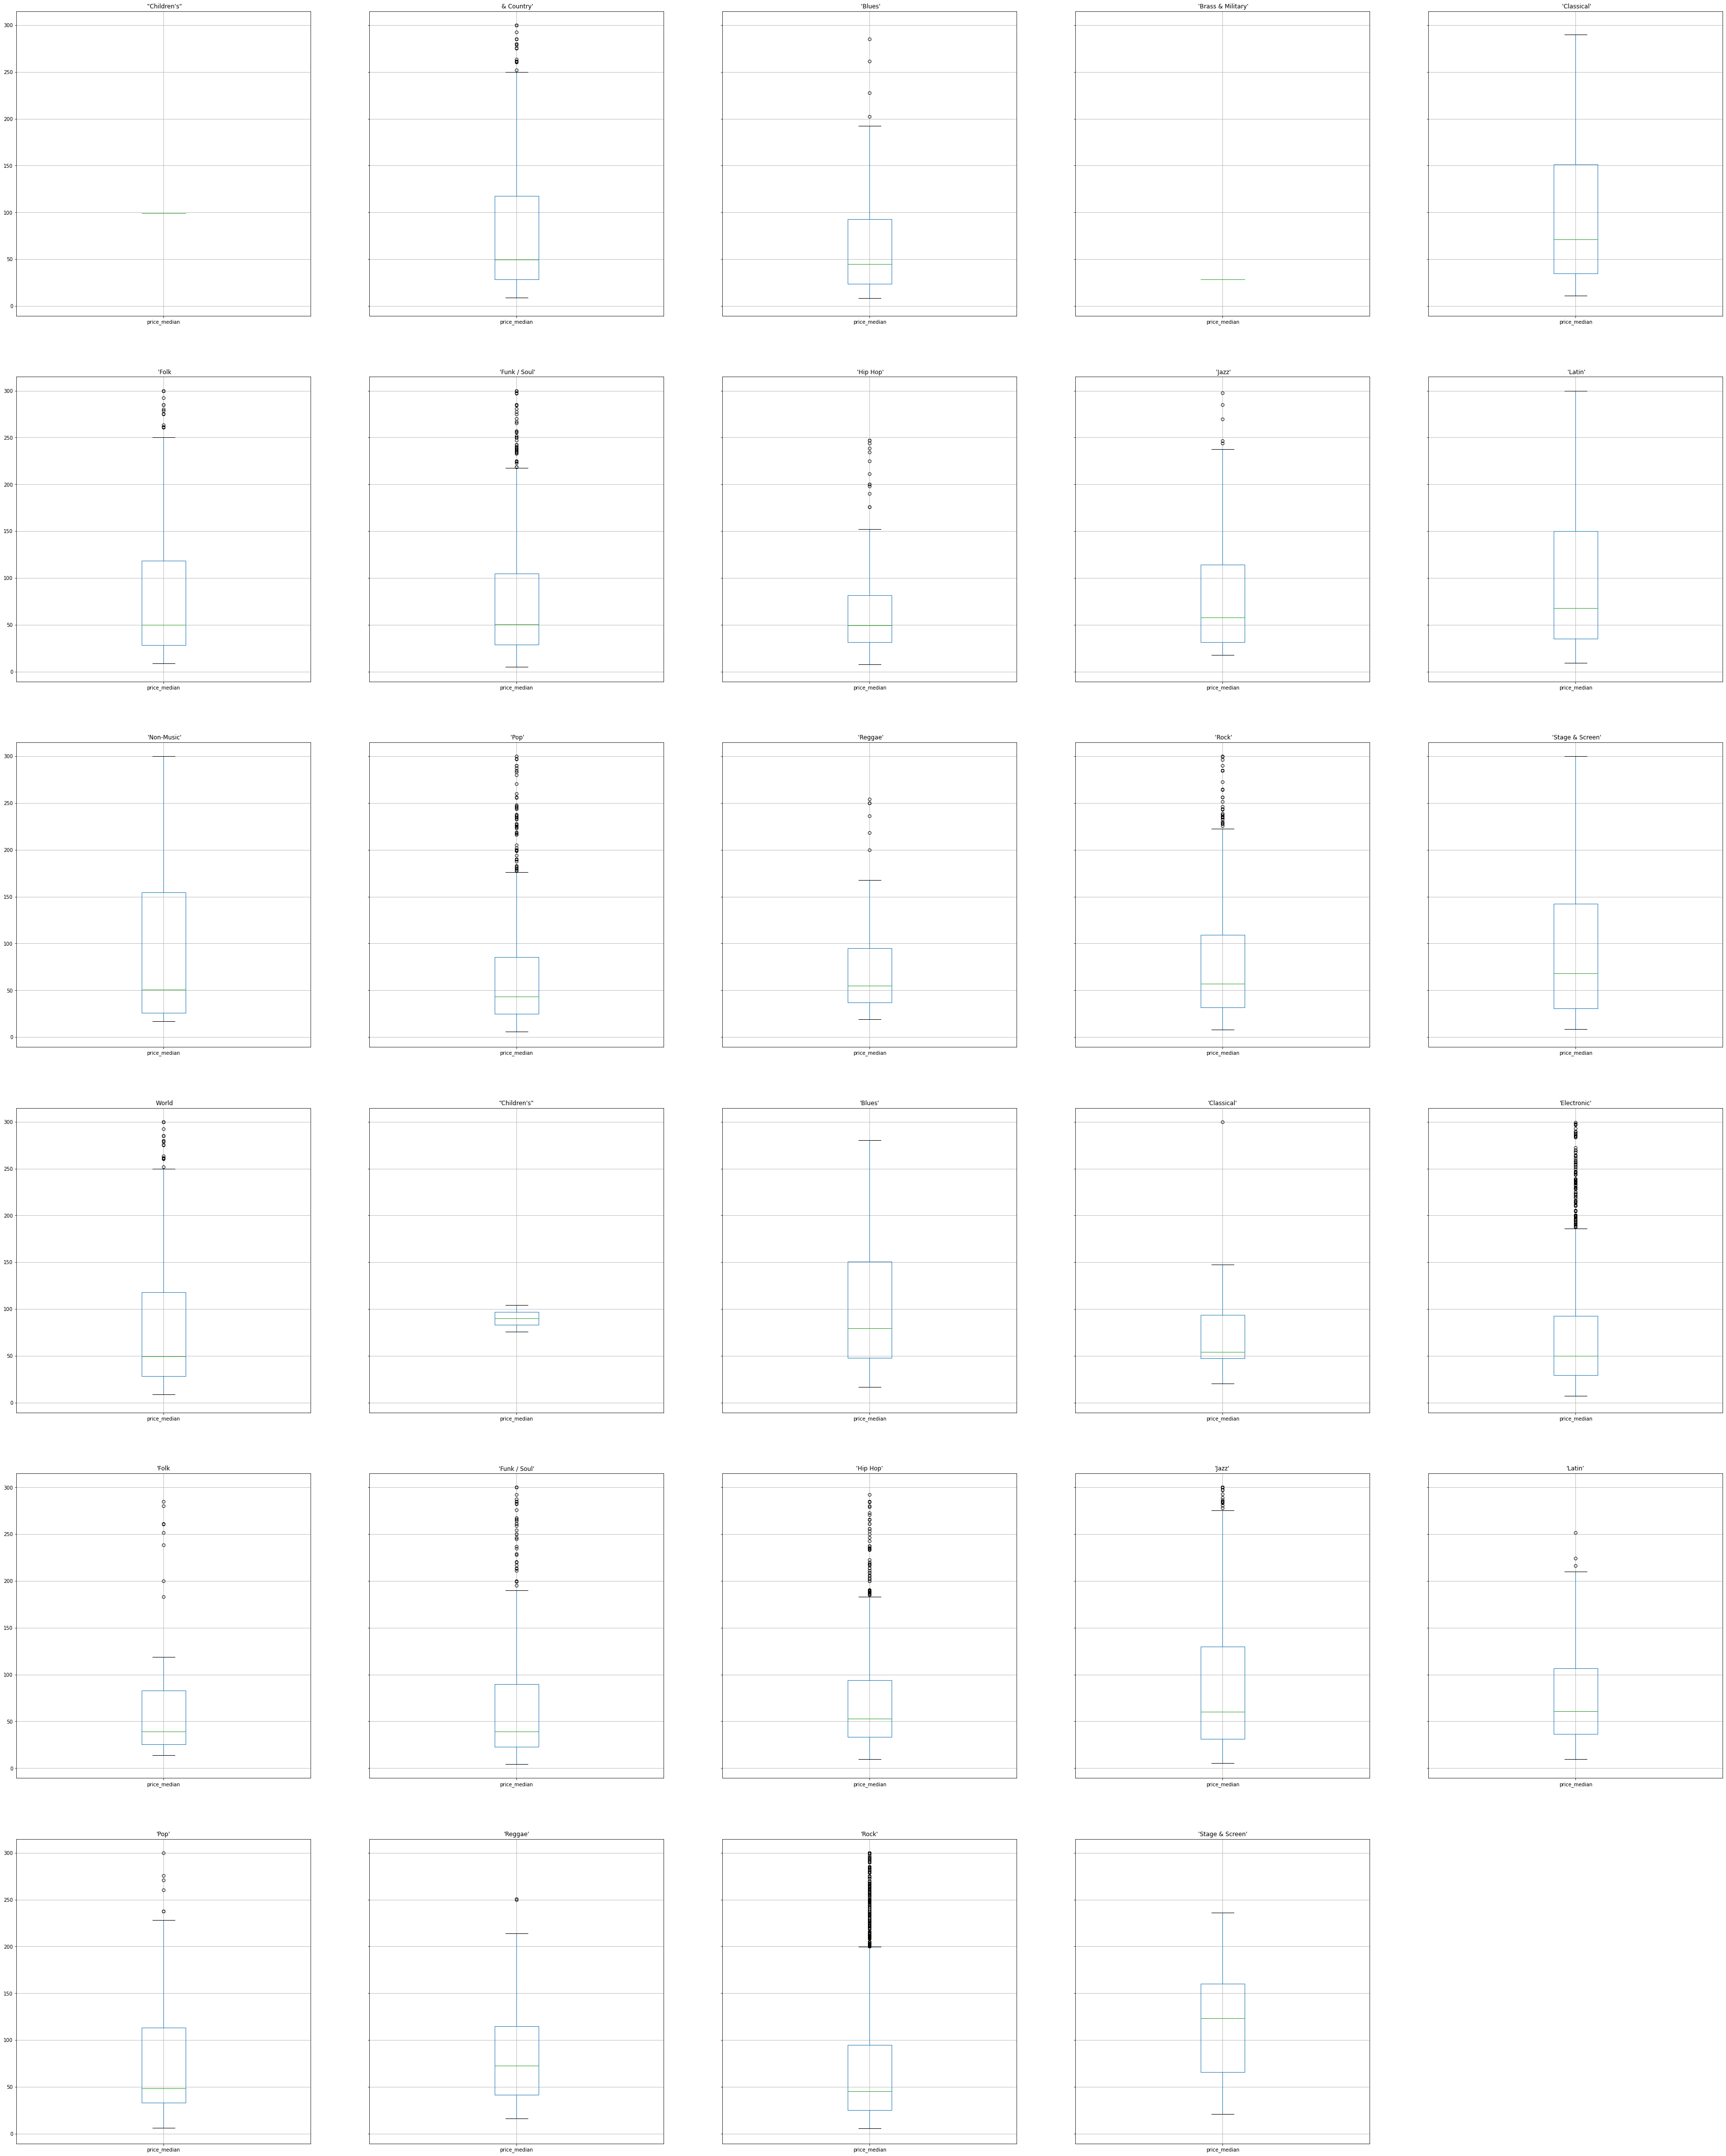

In [170]:
df_long_price_limit.groupby("genre_list").boxplot(column="price_median",figsize=(60,80));